# SVM

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import pandas as pd
import numpy as np

## Using Direction as the dependent variable

### Taking AAPL Daily stock data as an example

In [36]:
freq = 'Daily'
stock = 'AAPL'

price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
price = price.loc[(price.Date<='2019-12-31')&(price.Date>='2010-01-04'),:]
price = price.loc[(price.Date>='2010-01-04'),:]
y = price.direction.shift(-1).values[:-1]
predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv')
NLP = pd.read_csv('../predictors/NLP/'+freq+'/NYT_macro_SA.csv')
predictors = pd.merge(predictors,NLP,how='left',on=['Date'])
predictors = predictors.loc[predictors.Date <= '2019-12-31',:]
predictors.set_index('Date',inplace=True)
predictors.fillna(0,inplace=True) 
X = predictors.values[:-1]

Linear Kernel

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=5)
X_res,y_res = sm.fit_resample(X_train,y_train)
pipe = make_pipeline(StandardScaler(),SVC(kernel='linear'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.02      0.03       227
         1.0       0.55      0.99      0.71       276

    accuracy                           0.55       503
   macro avg       0.61      0.51      0.37       503
weighted avg       0.60      0.55      0.40       503



Polynomial Kernel

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)
pipe = make_pipeline(StandardScaler(),SVC(kernel='poly',degree=5))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.97      0.70       341
         1.0       0.93      0.34      0.50       414

    accuracy                           0.62       755
   macro avg       0.74      0.65      0.60       755
weighted avg       0.76      0.62      0.59       755



RBF Kernel

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)
pipe = make_pipeline(StandardScaler(),SVC(kernel='rbf'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.23      0.36       341
         1.0       0.60      0.93      0.73       414

    accuracy                           0.62       755
   macro avg       0.67      0.58      0.54       755
weighted avg       0.67      0.62      0.56       755



Sigmoid Kernel

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)
pipe = make_pipeline(StandardScaler(),SVC(kernel='sigmoid'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.51      0.46       341
         1.0       0.50      0.41      0.45       414

    accuracy                           0.45       755
   macro avg       0.46      0.46      0.45       755
weighted avg       0.46      0.45      0.45       755



## Using Direction2 to be the dependent variable

In [46]:
import pandas as pd
import numpy as np

freq = 'Daily'
stock = 'AAPL'

price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
price = price.loc[(price.Date<='2019-12-31')&(price.Date>='2010-01-04'),:]
price = price.loc[(price.Date>='2010-01-04'),:]
y = price.direction2.shift(-1).values[:-1]
predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv')
NLP = pd.read_csv('../predictors/NLP/'+freq+'/NYT_macro_SA.csv')
predictors = pd.merge(predictors,NLP,how='left',on=['Date'])
predictors = predictors.loc[predictors.Date <= '2019-12-31',:]
predictors.set_index('Date',inplace=True)
predictors.fillna(0,inplace=True) 
X = predictors.values[:-1]

## Linear Kernel

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=5)
X_res,y_res = sm.fit_resample(X_train,y_train)
pipe = make_pipeline(StandardScaler(),SVC(kernel='linear'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.88      0.46       164
         1.0       0.55      0.07      0.12       339

    accuracy                           0.33       503
   macro avg       0.43      0.48      0.29       503
weighted avg       0.47      0.33      0.23       503



## Polynomial Kernel

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
pipe = make_pipeline(StandardScaler(),SVC(kernel='poly',degree=5))
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02       164
         1.0       0.68      1.00      0.81       339

    accuracy                           0.68       503
   macro avg       0.84      0.51      0.42       503
weighted avg       0.78      0.68      0.55       503



## RBF Kernel

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)
pipe = make_pipeline(StandardScaler(),SVC(kernel='rbf'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.12      0.21       232
         1.0       0.72      1.00      0.84       523

    accuracy                           0.73       755
   macro avg       0.86      0.56      0.52       755
weighted avg       0.80      0.73      0.64       755



## Sigmoid Kernel

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
pipe = make_pipeline(StandardScaler(),SVC(kernel= 'sigmoid'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.29      0.56      0.38       164
         1.0       0.62      0.34      0.44       339

    accuracy                           0.41       503
   macro avg       0.45      0.45      0.41       503
weighted avg       0.51      0.41      0.42       503



### We found that direction 2 is super powerful based on the result

Based on the above result, we can find that RBF kernel and polynomial kernel are super powerful. So, we will select rbf kernel for the future tuning purpose to save the complexity.

# Feature Selection Task

From the part, we will use the weighted F1-score to evaluate the classification problem, which will include the biase situation into the consideration, which will place a penalty on the biased prediction result.

In [51]:
tech_list = ['SMA','EMA','STOCH_k','STOCK_d','RSI','MFI','SAR','AD','MACD','MACD_Signal','MACD_Histo','VWAP','SPY','NDAQ','PC1','PC2']
funda_list = ['pcf','PEG_trailing','dpr','npm','gpm','roa','roe','capital_ratio','de_ratio','cash_ratio','curr_ratio','inv_turn','pay_turn','sale_nwc','rd_sale','accrual']
macro_list = ['gdpr1','gdpr2','cpi','bond20yr','bond30yr','fedfunds','cpir','wpir','unemp','employ']
nlp_list = ['Pos_lag2','Pos_lag3','Neg_lag1','Neg_lag2','Neg_lag3','Neu_lag1','Neu_lag2','Neu_lag3']
stock_list = ['AAPL','AMZN','BRK-B','GOOG','JNJ','META','MSFT','NVDA','TSLA','V']

In [54]:
cv = 5
scores = dict()
selection_collect = dict()
for j in stock_list:
    freq = 'Daily'
    stock = j
    price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
    price = price.loc[(price.Date<='2019-12-31')&(price.Date>='2010-01-04'),:]
    price = price.loc[(price.Date>='2010-01-04'),:]
    y = price.direction2.shift(-1).values[:-1]
    predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv')
    NLP = pd.read_csv('../predictors/NLP/Daily/NYT_macro_SA.csv')
    predictors = pd.merge(predictors,NLP,how='left',on=['Date'])
    predictors = predictors.loc[predictors.Date <= '2019-12-31',:]
    predictors.set_index('Date',inplace=True)
    predictors.fillna(0,inplace=True) 
    X = predictors.values[:-1]
    
    tscv = TimeSeriesSplit(n_splits=cv)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
    pipe = make_pipeline(StandardScaler(),SVC(kernel='rbf'))
    
    sfs = SequentialFeatureSelector(pipe,n_jobs = -1,n_features_to_select='auto',scoring='f1_weighted',cv=tscv)
    sfs.fit(X_train,y_train)
    X_train = sfs.transform(X_train)
    pipe.fit(X_train,y_train)
    selection_collect[j] = predictors.columns.values[sfs.get_support()]
    X_test =  sfs.transform(X_test)
    y_pred = pipe.predict(X_test)
    scores[j] = f1_score(y_pred,y_test,average = 'weighted')

In [55]:
scores

{'AAPL': 0.799190570860551,
 'AMZN': 0.7626929453181244,
 'BRK-B': 0.7281921618204804,
 'GOOG': 0.6887218112692006,
 'JNJ': 0.6730556428456579,
 'META': 0.6916524701873935,
 'MSFT': 0.7173147623013855,
 'NVDA': 0.747552711414876,
 'TSLA': 0.49260902525320877,
 'V': 0.8275058275058276}

In [56]:
selection_collect

{'AAPL': array(['dpr', 'gpm', 'capital_ratio', 'de_ratio', 'cash_ratio',
        'curr_ratio', 'sale_nwc', 'rd_sale', 'cpi', 'fedfunds', 'wpir',
        'SMA', 'EMA', 'STOCH_k', 'STOCK_d', 'RSI', 'MFI', 'MACD_Histo',
        'SPY', 'NDAQ', 'Pos_lag2', 'Pos_lag3', 'Neg_lag1', 'Neg_lag2'],
       dtype=object),
 'AMZN': array(['PEG_trailing', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'cash_ratio',
        'curr_ratio', 'inv_turn', 'pay_turn', 'sale_nwc', 'cpir', 'wpir',
        'RSI', 'MFI', 'MACD', 'MACD_Signal', 'MACD_Histo', 'Pos_lag2',
        'Pos_lag3', 'Neg_lag2', 'Neg_lag3', 'Neu_lag1', 'Neu_lag3'],
       dtype=object),
 'BRK-B': array(['dpr', 'npm', 'roa', 'cash_ratio', 'curr_ratio', 'inv_turn',
        'sale_nwc', 'rd_sale', 'gdpr1', 'bond20yr', 'bond30yr', 'fedfunds',
        'cpir', 'wpir', 'SMA', 'EMA', 'STOCH_k', 'STOCK_d', 'MACD_Histo',
        'VWAP', 'Pos_lag1', 'Neg_lag1', 'Neg_lag2', 'Neu_lag1'],
       dtype=object),
 'GOOG': array(['pcf', 'dpr', 'npm', 'capital_ratio', 'de

## Feature Selection Statistics

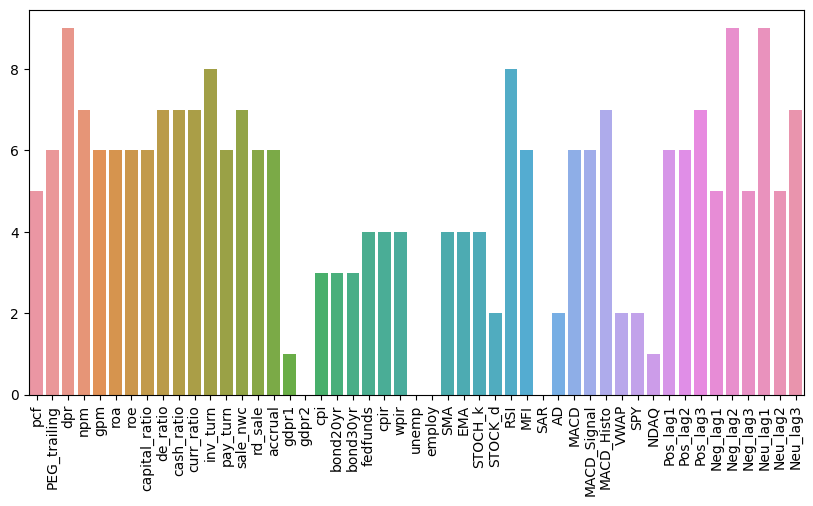

In [59]:
features = pd.Series(data = np.zeros(len(predictors.columns)),index=predictors.columns)
for stock in stock_list:
    curr_feature = selection_collect[stock]
    for curr in curr_feature:
        features.loc[curr] += 1
usefeature = features.index.values.tolist()
plt.figure(figsize=[10,5])
ax = sns.barplot(features.to_frame().T)
ax.set_xticklabels(labels=usefeature,rotation=90)
plt.show()

From there, we can find that Fundamental indicators and sentiments indicators supports a lot for the classification tasks.

## Weekly Frequency Investigation

In [60]:
cv = 5
scores = dict()
selection_collect = dict()
for j in stock_list:
    freq = 'Weekly'
    stock = j
    price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
    price = price.loc[(price.Date<='2019-12-31')&(price.Date>='2010-01-04'),:]
    price = price.loc[(price.Date>='2010-01-04'),:]
    y = price.direction2.shift(-1).values[:-1]
    predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv')
    NLP = pd.read_csv('../predictors/NLP/Daily/NYT_macro_SA.csv')
    predictors = pd.merge(predictors,NLP,how='left',on=['Date'])
    predictors = predictors.loc[predictors.Date <= '2019-12-31',:]
    predictors.set_index('Date',inplace=True)
    predictors.fillna(0,inplace=True) 
    X = predictors.values[:-1]
    
    tscv = TimeSeriesSplit(n_splits=cv)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
    pipe = make_pipeline(StandardScaler(),SVC(kernel='rbf'))
    
    sfs = SequentialFeatureSelector(pipe,n_jobs = -1,n_features_to_select='auto',scoring='f1_weighted',cv=tscv)
    sfs.fit(X_train,y_train)
    X_train = sfs.transform(X_train)
    pipe.fit(X_train,y_train)
    selection_collect[j] = predictors.columns.values[sfs.get_support()]
    X_test =  sfs.transform(X_test)
    y_pred = pipe.predict(X_test)
    scores[j] = f1_score(y_pred,y_test,average = 'weighted')

In [61]:
scores

{'AAPL': 0.7807841383422779,
 'AMZN': 0.7906976744186047,
 'BRK-B': 0.7160493827160492,
 'GOOG': 0.5449999999999999,
 'JNJ': 0.6683473788006626,
 'META': 0.6776859504132231,
 'MSFT': 0.6871558911436212,
 'NVDA': 0.7378435517970403,
 'TSLA': 0.625,
 'V': 0.8444444444444443}

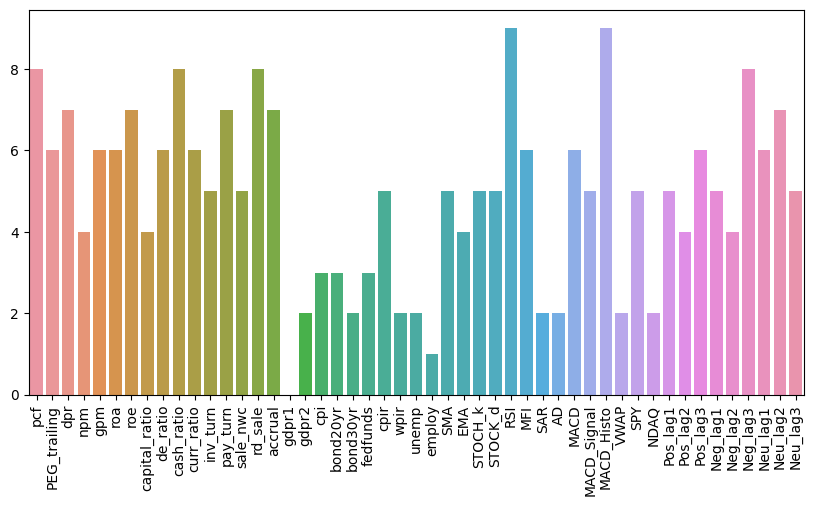

In [62]:
features = pd.Series(data = np.zeros(len(predictors.columns)),index=predictors.columns)
for stock in stock_list:
    curr_feature = selection_collect[stock]
    for curr in curr_feature:
        features.loc[curr] += 1
usefeature = features.index.values.tolist()
plt.figure(figsize=[10,5])
ax = sns.barplot(features.to_frame().T)
ax.set_xticklabels(labels=usefeature,rotation=90)
plt.show()

## Monthly Frequency 

In [63]:
cv = 5
scores = dict()
selection_collect = dict()
for j in stock_list:
    freq = 'Monthly'
    stock = j
    price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
    price = price.loc[(price.Date<='2019-12-31')&(price.Date>='2010-01-04'),:]
    price = price.loc[(price.Date>='2010-01-04'),:]
    y = price.direction2.shift(-1).values[:-1]
    predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv')
    predictors = predictors.loc[predictors.Date <= '2019-12-31',:]
    predictors.set_index('Date',inplace=True)
    predictors.fillna(0,inplace=True) 
    X = predictors.values[:-1]
    
    tscv = TimeSeriesSplit(n_splits=cv)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
    pipe = make_pipeline(StandardScaler(),SVC(kernel='rbf'))
    
    sfs = SequentialFeatureSelector(pipe,n_jobs = -1,n_features_to_select='auto',scoring='f1_weighted',cv=tscv)
    sfs.fit(X_train,y_train)
    X_train = sfs.transform(X_train)
    pipe.fit(X_train,y_train)
    selection_collect[j] = predictors.columns.values[sfs.get_support()]
    X_test =  sfs.transform(X_test)
    y_pred = pipe.predict(X_test)
    scores[j] = f1_score(y_pred,y_test,average = 'weighted')

In [64]:
scores

{'AAPL': 0.8292682926829268,
 'AMZN': 0.8000000000000002,
 'BRK-B': 0.6666666666666666,
 'GOOG': 0.8024844720496895,
 'JNJ': 0.7027027027027027,
 'META': 0.6666666666666666,
 'MSFT': 0.8571428571428571,
 'NVDA': 0.7692307692307693,
 'TSLA': 0.5093167701863354,
 'V': 0.8292682926829268}

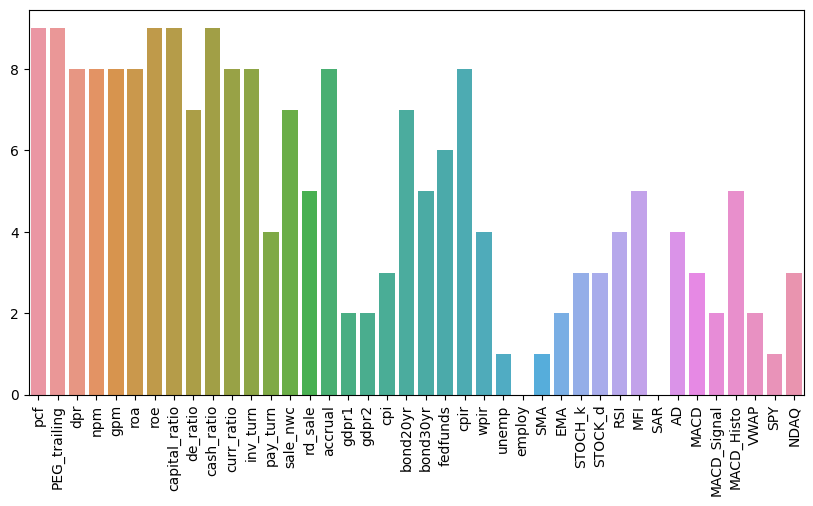

In [65]:
features = pd.Series(data = np.zeros(len(predictors.columns)),index=predictors.columns)
for stock in stock_list:
    curr_feature = selection_collect[stock]
    for curr in curr_feature:
        features.loc[curr] += 1
usefeature = features.index.values.tolist()
plt.figure(figsize=[10,5])
ax = sns.barplot(features.to_frame().T)
ax.set_xticklabels(labels=usefeature,rotation=90)
plt.show()

## Conclusion

- Direction 2 as the prediction dependent variable, can provide us the highest prediction results.

- From the above scores, we can find that when the frequency increase from Monthly to Daily, the classification performance decreased a little. On the monthly frequency, we can get the best prediction result.

- As for the features, the fundamental indicators are super powerful for all the classification tasks. It supports the most of prediction tasks for each stocks and bring the accuracy for the prediction.